# Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,NaN,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# info for find null
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       496 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,496.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286458,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.707038,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884750,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629250,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

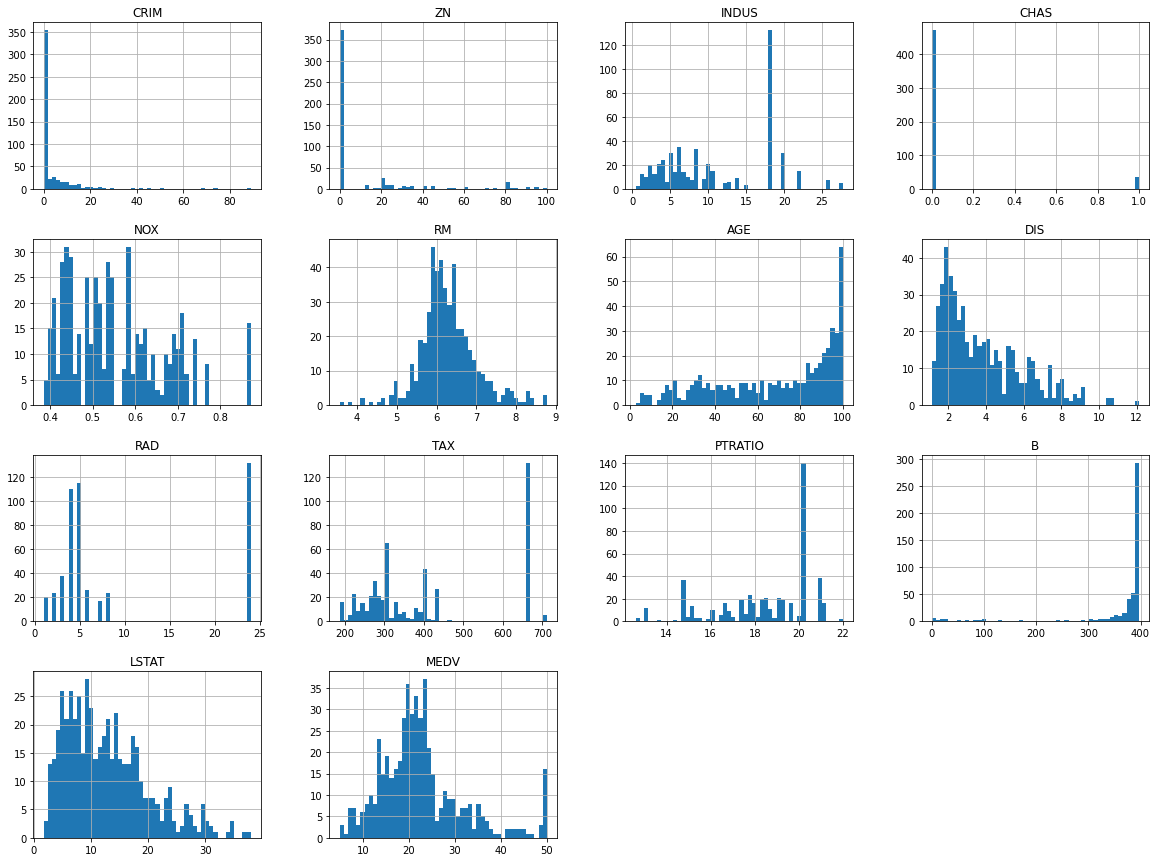

In [8]:
#for plotin histogram
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15));

## Train Test Splitting

In [9]:
#for learningpurpose
import numpy as np
np.random.seed(42)
def split_train_test(data, test_ratio):
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    
    

In [10]:
#train_set, test_set = split_train_test(housing, 0.2)

In [11]:
#print(f"Rows in train set : {len(train_set)}\nRow test set:{len(test_set)}\n")

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(f"Rows in train set : {len(train_set)}\nRow test set:{len(test_set)}\n")

Rows in train set : 404
Row test set:102



In [13]:
train_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
477,15.02340,0.0,18.10,0,0.6140,5.304,97.3,2.1007,24,666,20.2,349.48,24.91,12.0
15,0.62739,0.0,8.14,0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47,19.9
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
423,7.05042,0.0,18.10,0,0.6140,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4
19,0.72580,0.0,8.14,0,0.5380,5.727,69.5,3.7965,4,307,21.0,390.95,11.28,18.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.5200,5.836,91.9,2.2110,5,384,20.9,395.67,18.66,19.5
270,0.29916,20.0,6.96,0,0.4640,5.856,42.1,4.4290,3,223,18.6,388.65,13.00,21.1
348,0.01501,80.0,2.01,0,0.4350,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5
435,11.16040,0.0,18.10,0,0.7400,6.629,94.6,2.1247,24,666,20.2,109.85,23.27,13.4


In [14]:
test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,395.50,9.04,23.6
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,396.90,3.53,32.4
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,390.11,18.07,13.6
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,390.91,5.52,22.8
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,385.09,17.27,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666,20.2,28.79,34.37,17.9
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666,20.2,27.49,18.05,9.6
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666,20.2,35.05,21.22,17.2
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247,18.5,395.99,12.86,22.5


In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set= housing.loc[train_index]
    strat_test_set= housing.loc[test_index]


In [16]:
strat_test_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
342,0.02498,0.0,1.89,0,0.518,6.540,59.7,6.2669,1,422,15.9,389.96,8.65,16.5
379,17.86670,0.0,18.10,0,0.671,6.223,100.0,1.3861,24,666,20.2,393.74,21.78,10.2
223,0.61470,0.0,6.20,0,0.507,6.618,80.8,3.2721,8,307,17.4,396.90,7.60,30.1
219,0.11425,0.0,13.89,1,0.550,6.373,92.4,3.3633,5,276,16.4,393.74,10.50,23.0
48,0.25387,0.0,6.91,0,0.448,5.399,95.3,5.8700,3,233,17.9,396.90,30.81,14.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.05660,0.0,3.41,0,0.489,7.007,86.3,3.4217,2,270,17.8,396.90,5.50,23.6
466,3.77498,0.0,18.10,0,0.655,5.952,84.7,2.8715,24,666,20.2,22.01,17.15,19.0
52,0.05360,21.0,5.64,0,0.439,6.511,21.1,6.8147,4,243,16.8,396.90,5.28,25.0
121,0.07165,0.0,25.65,0,0.581,6.004,84.1,2.1974,2,188,19.1,377.67,14.27,20.3


In [17]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [18]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [19]:
print(28/376)
print(7/95)

0.07446808510638298
0.07368421052631578


In [20]:
 housing= strat_train_set.copy()

## Lookin for Correlations

In [21]:
corr_matrix = housing.corr()

In [22]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679428
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

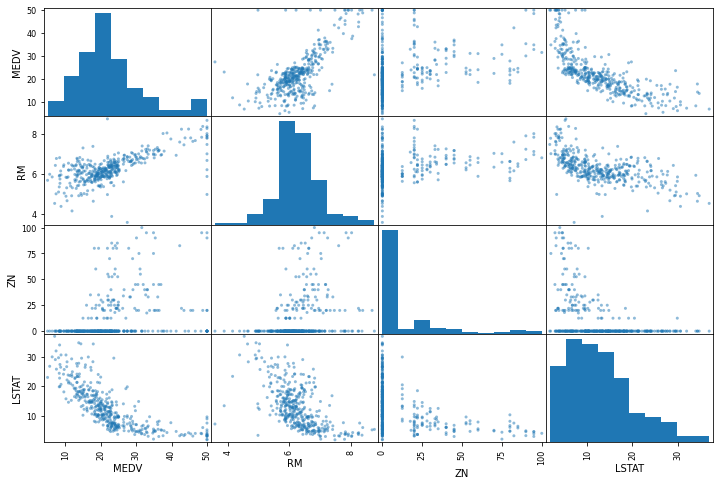

In [23]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

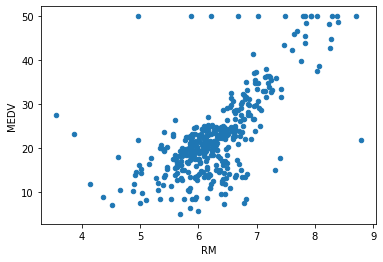

In [24]:
housing.plot(kind='scatter',x="RM",y='MEDV')

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

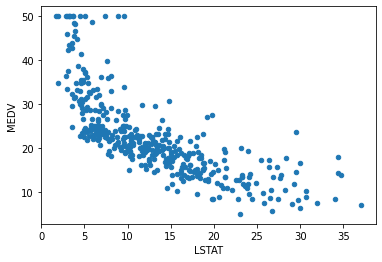

In [25]:
housing.plot(kind="scatter",x='LSTAT',y='MEDV')

## Trying out attribute combinations

In [26]:
housing['TAXRM'] = housing['TAX']/housing['RM']
housing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6,65.507152
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4,109.126659
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,35.294118
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,102.068966


In [27]:
corr_matrix=housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)
    

MEDV       1.000000
RM         0.679428
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525773
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

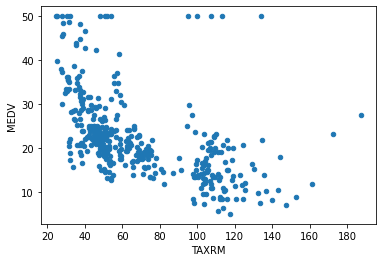

In [28]:
housing.plot(kind='scatter',x='TAXRM',y='MEDV')

In [29]:
housing = strat_train_set.drop('MEDV', axis=1)
housing_labels= strat_train_set['MEDV'].copy()

## Missing Attributes

### To take care of missing attributes, you have three options:
    1) get rid of the missing data point
    2) get rid of the whole attribute
    3) set the value to some value '0, maen or median' 

In [30]:
a=housing.dropna(subset=['RM']) #optin 1
a.shape
#note : original housing dataframe will ramain unchanged

(397, 13)

In [31]:
housing.drop("RM", axis=1).shape #option 2
#note : original housing dataframe will ramain unchanged

(404, 12)

In [32]:
median=housing['RM'].median()
median

6.211

In [33]:
housing['RM'].fillna(median) #option 3

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [34]:
housing.shape

(404, 13)

In [35]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,397.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280856,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716174,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [36]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [38]:
x= imputer.transform(housing)

In [39]:
housing_tr = pd.DataFrame(x,columns=housing.columns)

In [40]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279646,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.709986,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

### three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. 
Fit method - Fits the dataset and calculater internal parameters

2. Transformers - transform method takes input and return output based on the learings from fit(). It also has a convenience fuction called fit_transform() which fits and then transforms.

3. Predictor - LinearRegression model is an example of predictor. fit() and predict() are two common functions. it also give score() function which will evaluate the predictions


## Feature Scaling

primarily, two type of feature scaling method:
1. min-max scaling (normalization)
   (value-min)/(max-min)
   Sklearn provides a class called MinMaxScaler for this

2. Standardization
   (value - mean)/std
   Sklearn provides a class called StandardScaler for this

# Creating Pipeline

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline= Pipeline([
    ('inputer', SimpleImputer(strategy='median')),
#....... add as many as you want in your pipeline
    ('std_scaler', StandardScaler())
])

In [42]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [43]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [44]:
housing_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
       ... 
155    15.6
423    13.4
98     43.8
455    14.1
216    23.3
Name: MEDV, Length: 404, dtype: float64

 ### Selecting a desired model for Real Estates

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor()
model= RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [42]:
some_data=housing.iloc[:5]

In [43]:
some_labels = housing_labels.iloc[:5]

In [44]:
prepared_data= my_pipeline.transform(some_data)

In [45]:
model.predict(prepared_data)

array([22.56 , 25.164, 16.473, 23.422, 23.478])

In [46]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [47]:
from sklearn.metrics import mean_squared_error
housing_predictions= model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels ,housing_predictions)
rmse =np.sqrt(mse)

In [48]:
rmse

1.32245442097055

 ### Using better evaluation technique - Cross Validation

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [50]:
rmse_scores

array([2.80810658, 2.87482992, 4.52873018, 2.70040831, 3.27247258,
       2.66741133, 4.72739857, 3.57397339, 2.75726076, 3.46926549])

In [51]:
def print_scores(scores):
    print('Scores :', scores)
    print('Mean :', scores.mean())
    print('Standard deviation :', scores.std())
    

In [52]:
print_scores(rmse_scores)

Scores : [2.80810658 2.87482992 4.52873018 2.70040831 3.27247258 2.66741133
 4.72739857 3.57397339 2.75726076 3.46926549]
Mean : 3.337985713241055
Standard deviation : 0.715140448616487


## Testing the model on test data

In [54]:
x_test =strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()
x_test_prepared = my_pipeline.transform(x_test)
final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmsem = np.sqrt(final_mse)


In [55]:
final_rmsem

2.998841586803993

In [56]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24205962, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])